In [3]:
import re
def extractData (file):
    file = "data\\" + file
    f = open(file, "r")
    currentLine = f.readline()
    currentLine = f.readline()
    currentLine = f.readline()
    currentLine = f.readline()
    results = []
    while (currentLine != "done"):
        
        split = currentLine.split()
        d = dict()
        d["Threads"] = int(split[0])
        d["UpdateRatio"] = int(split[1])
        d["Size"] = int(split[2])
        d["Range"] = int(split[3])
        currentLine = f.readline()
        d["Throughput"] = float(currentLine.split()[2])
        results.append(d)
        currentLine = f.readline()
    return results
        
        
            
        
        

In [4]:
import matplotlib.pyplot as plt
def throughputPerThreadRatio10(data, title):
    x = []
    y1 = []
    y2 = []
    y3 = []
    for dictionnaire in data:
        if(dictionnaire["UpdateRatio"] == 10):
            if(dictionnaire["Size"] == 100):
                x.append(dictionnaire["Threads"])
                y1.append(dictionnaire["Throughput"]/1000000)
            if(dictionnaire["Size"] == 1000):
                y2.append(dictionnaire["Throughput"]/1000000)
            if(dictionnaire["Size"] == 10000):
                y3.append(dictionnaire["Throughput"]/1000000)
    plt.plot(x,y1, label = "ListSize 100")
    plt.plot(x,y2, label = "ListSize 1000")
    plt.plot(x,y3, label = "ListSize 10000")
    plt.xlabel("Number of cores")
    plt.ylabel("Throughput in millions per second")
    plt.title(title)
    plt.legend()
    
    plt.savefig("plots\\" + title)
    plt.show()
    
        

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.11 from "/Users/ad/anaconda3/bin/python"
  * The NumPy version is: "1.24.3"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: dlopen(/Users/ad/anaconda3/lib/python3.11/site-packages/numpy/core/_multiarray_umath.cpython-311-darwin.so, 0x0002): Library not loaded: @rpath/libopenblas.0.dylib
  Referenced from: <D861DA83-9FCD-3D45-95C4-C308B540214C> /Users/ad/anaconda3/lib/python3.11/site-packages/numpy/core/_multiarray_umath.cpython-311-darwin.so
  Reason: tried: '/Users/ad/anaconda3/lib/python3.11/site-packages/numpy/core/../../../../libopenblas.0.dylib' (no such file), '/Users/ad/anaconda3/lib/python3.11/site-packages/numpy/core/../../../../libopenblas.0.dylib' (no such file), '/Users/ad/anaconda3/bin/../lib/libopenblas.0.dylib' (no such file), '/Users/ad/anaconda3/bin/../lib/libopenblas.0.dylib' (no such file), '/usr/local/lib/libopenblas.0.dylib' (no such file), '/usr/lib/libopenblas.0.dylib' (no such file, not in dyld cache)


In [11]:
import matplotlib.pyplot as plt
def throughputPerThreadListSize100(data, title):
    x = []
    y1 = []
    y2 = []
    y3 = []
    for dictionnaire in data:
        if(dictionnaire["Size"] == 100):
            if(dictionnaire["UpdateRatio"] == 0):
                x.append(dictionnaire["Threads"])
                y1.append(dictionnaire["Throughput"]/1000000)
            if(dictionnaire["UpdateRatio"] == 10):
                y2.append(dictionnaire["Throughput"]/1000000)
            if(dictionnaire["UpdateRatio"] == 100):
                y3.append(dictionnaire["Throughput"]/1000000)
    plt.plot(x,y1, label = "UpdateRatio 0")
    plt.plot(x,y2, label = "UpdateRatio 10")
    plt.plot(x,y3, label = "UpdateRatio 100")
    plt.xlabel("Number of cores")
    plt.ylabel("Throughput in millions per second")
    plt.title(title)
    plt.legend()
    
    plt.savefig("plots\\" + title)
    plt.show()

In [12]:
import matplotlib.pyplot as plt
def throughputPerThreadListRatio10Size100(data1, data2, data3, title):
    x = []
    y1 = []
    y2 = []
    y3 = []
    for dictionnaire in data1:
        if(dictionnaire["Size"] == 1000 and dictionnaire["UpdateRatio"] == 10 ):
                x.append(dictionnaire["Threads"])
                y1.append(dictionnaire["Throughput"]/1000000)
    for dictionnaire in data2:
        if(dictionnaire["Size"] == 1000 and dictionnaire["UpdateRatio"] == 10 ):
                y2.append(dictionnaire["Throughput"]/1000000)
    for dictionnaire in data3:
        if(dictionnaire["Size"] == 1000 and dictionnaire["UpdateRatio"] == 10 ):
                y3.append(dictionnaire["Throughput"]/1000000)
    plt.plot(x,y1, label = "Coarse grained algorithm")
    plt.plot(x,y2, label = "Hand over hand algorithm")
    plt.plot(x,y3, label = "Lazy linked algorithm")
    plt.xlabel("Number of cores")
    plt.ylabel("Throughput in millions per second")
    plt.title(title)
    plt.legend()
    
    plt.savefig("plots\\" + title)
    plt.show()

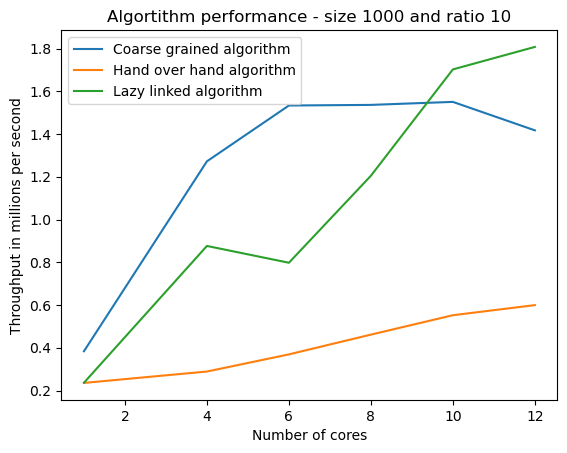

In [13]:
data1 = extractData("CoarseGrainedListBasedSet.data")
data2 = extractData("HandOverHandListIntSet.data")
data3 = extractData("LazyLinkedListSortedSet.data")
throughputPerThreadListRatio10Size100(data1, data2, data3, "Algortithm performance - size 1000 and ratio 10")

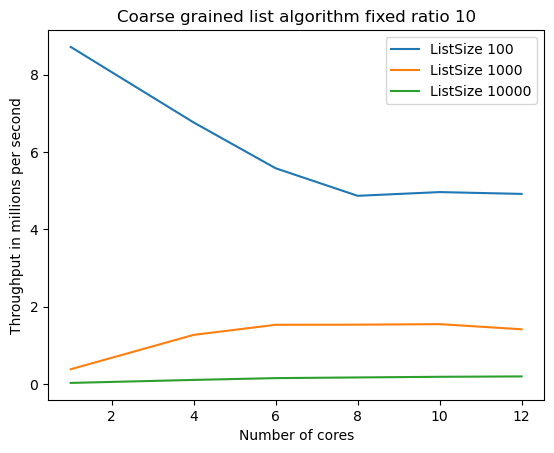

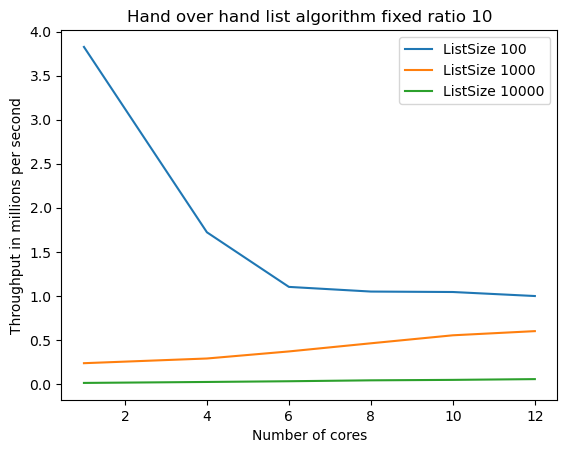

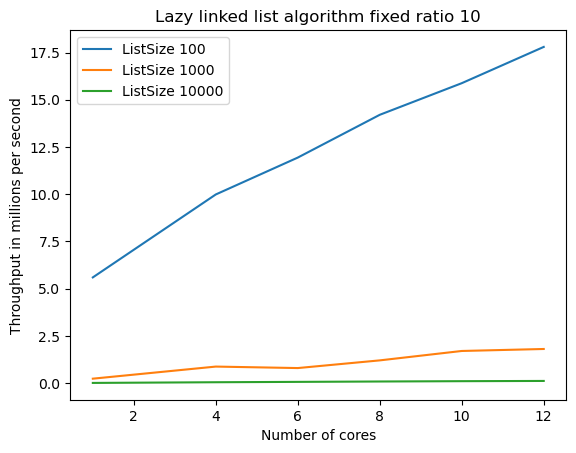

In [14]:
data1 = extractData("CoarseGrainedListBasedSet.data")
data2 = extractData("HandOverHandListIntSet.data")
data3 = extractData("LazyLinkedListSortedSet.data")
throughputPerThreadRatio10(data1, "Coarse grained list algorithm fixed ratio 10")
throughputPerThreadRatio10(data2, "Hand over hand list algorithm fixed ratio 10")
throughputPerThreadRatio10(data3, "Lazy linked list algorithm fixed ratio 10")


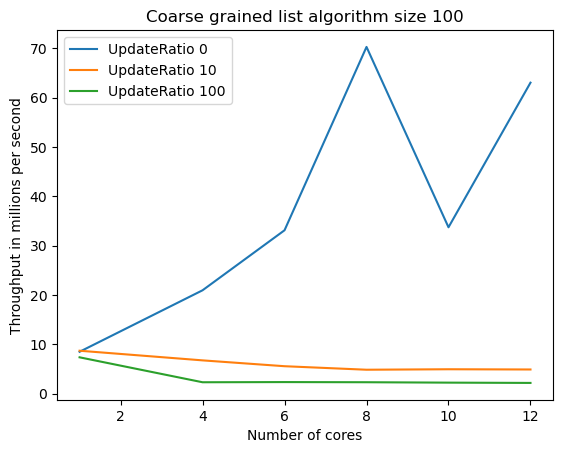

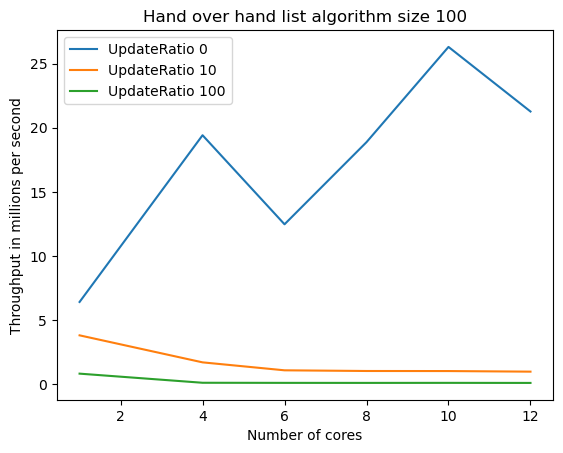

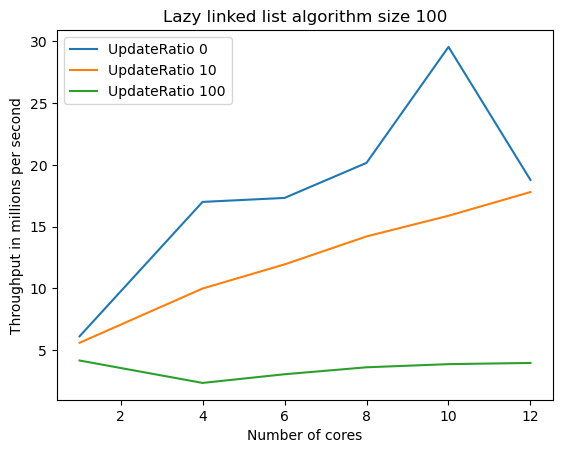

In [15]:
data1 = extractData("CoarseGrainedListBasedSet.data")
data2 = extractData("HandOverHandListIntSet.data")
data3 = extractData("LazyLinkedListSortedSet.data")
throughputPerThreadListSize100(data1, "Coarse grained list algorithm size 100")
throughputPerThreadListSize100(data2, "Hand over hand list algorithm size 100")
throughputPerThreadListSize100(data3, "Lazy linked list algorithm size 100")